# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [143]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Step1. 下載資料

In [144]:
breast_cancer=datasets.load_breast_cancer()

In [145]:
print(breast_cancer.keys())
print("\n")
print(breast_cancer.feature_names)
print("\n")
print(breast_cancer.target_names)
target=breast_cancer.target
features=breast_cancer.data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


['malignant' 'benign']


In [146]:
print("target:(以0,1表示)")
print(target)
print('\n')
print("將target文字化:")
target_names=breast_cancer.target_names
print(target_names[target])
labels=target_names[target]

target:(以0,1表示)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

In [148]:
malignant_mean_radius=features[labels=='malignant',0]
malignant_mean_texture=features[labels=='malignant',1]
malignant_mean_perimeter=features[labels=='malignant',2]
malignant_mean_area=features[labels=='malignant',3]
malignant_mean_concavity=features[labels=='malignant',6]
malignant_mean_concave_points=features[labels=='malignant',7]


malignant_radius_texture=np.c_[malignant_mean_radius,malignant_mean_texture]
malignant_perimeter_area=np.c_[malignant_mean_perimeter,malignant_mean_area]
malignant_concavity_points=np.c_[malignant_mean_concavity,malignant_mean_concave_points]

print("惡性腫瘤資料量數量:")
print(len(malignant_radius_texture))
print(len(malignant_perimeter_area))
print(len(malignant_concavity_points))

惡性腫瘤資料量數量:
212
212
212


In [149]:
benign_mean_radius=features[labels=='benign',0]
benign_mean_texture=features[labels=='benign',1]
benign_mean_perimeter=features[labels=='benign',2]
benign_mean_area=features[labels=='benign',3]
benign_mean_concavity=features[labels=='benign',6]
benign_mean_concave_points=features[labels=='benign',7]

benign_radius_texture=np.c_[benign_mean_radius,benign_mean_texture]
benign_perimeter_area=np.c_[benign_mean_perimeter,benign_mean_area]
benign_concavity_points=np.c_[benign_mean_concavity,benign_mean_concave_points]

print("良性腫瘤資料量數量:")
print(len(benign_radius_texture))
print(len(benign_perimeter_area))
print(len(benign_concavity_points))

良性腫瘤資料量數量:
357
357
357


前212筆腫瘤半徑與腫瘤紋理散佈圖(惡性vs良性)


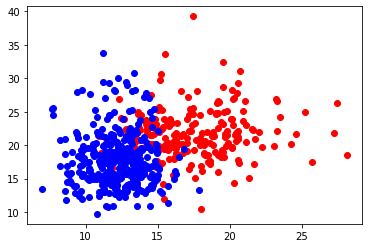

In [150]:
print("前212筆腫瘤半徑與腫瘤紋理散佈圖(惡性vs良性)")
plt.scatter(malignant_radius_texture[:,0],malignant_radius_texture[:,1],color='red')
plt.scatter(benign_radius_texture[:,0],benign_radius_texture[:,1],color='blue')

前212筆腫瘤周長與腫瘤面積散佈圖(惡性vs良性)


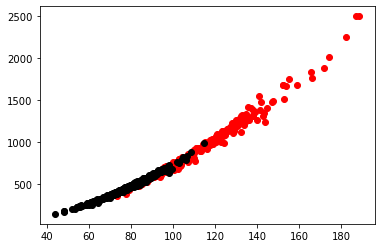

In [151]:
print("前212筆腫瘤周長與腫瘤面積散佈圖(惡性vs良性)")
plt.scatter(malignant_perimeter_area[:,0],malignant_perimeter_area[:,1],color='red')
plt.scatter(benign_perimeter_area[:,0],benign_perimeter_area[:,1],color='black')

前212筆腫瘤凹陷度與腫瘤凹陷點數散佈圖(惡性vs良性)


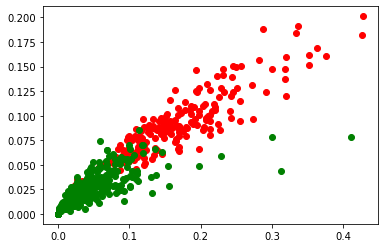

In [152]:
print("前212筆腫瘤凹陷度與腫瘤凹陷點數散佈圖(惡性vs良性)")
plt.scatter(malignant_concavity_points[:,0],malignant_concavity_points[:,1],color='red')
plt.scatter(benign_concavity_points[:,0],benign_concavity_points[:,1],color='green')

## Step2. 區分訓練集與測試集
...
由上圖可知,惡性腫瘤凹陷度與腫瘤凹陷點數間的關聯性較高，因此欲對這些資料進行training
...

In [153]:
print("惡性腫瘤凹陷度與腫瘤凹陷點數間的關聯")
training_data1=np.r_[malignant_concavity_points,benign_concavity_points]
training_labels1=np.r_[np.zeros(len(malignant_concavity_points)),np.ones(len(benign_concavity_points[:,1]))]

X_train, X_test, y_train, y_test = train_test_split(training_data1,training_labels1,test_size=0.3,random_state=0)


惡性腫瘤凹陷度與腫瘤凹陷點數間的關聯


## Step3. 建模
\\\
由圖表可知,腫瘤平均凹陷度(mean concavity)與腫瘤平均凹陷數目(mean concave points)呈現高度正相關。
此處的懲罰係數高達10000，以較明確區分惡性(malignant)與良性(benign)腫瘤
\\\

In [154]:
def SVM_plot(clf,title):
    training_x_min=training_data1[:,0].min()
    training_x_max=training_data1[:,0].max()
    training_y_min=training_data1[:,1].min()
    training_y_max=training_data1[:,1].max()
    grid_interval=0.05
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(malignant_concavity_points[:,0],malignant_concavity_points[:,1],color='red')
    plt.scatter(benign_concavity_points[:,0],benign_concavity_points[:,1],color='blue')
    
    plt.title(title)
    plt.show()

poly


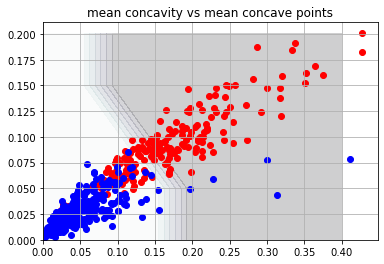

In [155]:
clf=svm.SVC(kernel='poly',gamma='auto',C=10000)
clf.fit(X_train,y_train)
print("poly")
SVM_plot(clf,'mean concavity vs mean concave points')


linear


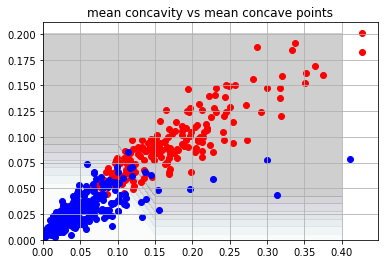

In [156]:
clf=svm.SVC(kernel='linear',gamma='auto',C=10000)
clf.fit(X_train,y_train)
print("linear")
SVM_plot(clf,'mean concavity vs mean concave points')


## Step4. 預測

```

```


In [157]:
clf.predict(X_test)

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1.])

## Step5. 準確度分析
模型預測的準確度高達90%以上

In [158]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.9095477386934674
0.9064327485380117


In [159]:
a=float(clf.score(X_train,y_train))
print("訓練組的準確度為:%.6f"%a)
b=float(clf.score(X_test, y_test))
print("測試組的準確度為:%.6f"%b)

訓練組的準確度為:0.909548
測試組的準確度為:0.906433
